# Probabilidad I:
Valor esperado e indicadores. Teorema de Bayes. Estimación Bayesiana. 


# 0. PMFs y PDFs conjuntas.

- Una PMF conjunta $p_{X,Y}$ de las variables $X$ y $Y$ está definida como 

\begin{equation}
p_{X,Y}(x,y)=P(X=x,Y=y)
\end{equation}

- La PMF marginal de X y Y puede ser obtenida a partir de la PMF conjunta, utilizando 

\begin{equation}
p_{X}(x)=\sum_{y}{p_{X,Y}(x,y)}
\end{equation}
y
\begin{equation}
p_{Y}(y)=\sum_{x}{p_{X,Y}(x,y)}
\end{equation}

De manera análoga, para $X$ y $Y$ que sean variables aleatorias conjuntas con una PDF conjunta $f_{X,Y}$ se tiene que 

\begin{equation}
f_{X,Y}(x,y)=f_{Y}(y)f_{X|Y}(x|y)
\end{equation}

\begin{equation}
f_{X}(x)=\int_{-\infty}^{\infty}f_{Y}(y)f_{X|Y}(x|y)dy
\end{equation}

#### Ejercicio 1: Realice dos gráficas de funciones de distribución conjuntas para variables aleatorias X,Y distribuidas normales para medias y varianzas iguales y medias y varianzas diferentes

Fórmula para distribución normal multivariada


\begin{equation}
f_X (x_1, ...,x_n)=\frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}} \exp{-\frac{1}{2}(x-\mu)^T \Sigma (x-\mu)}
\end{equation}


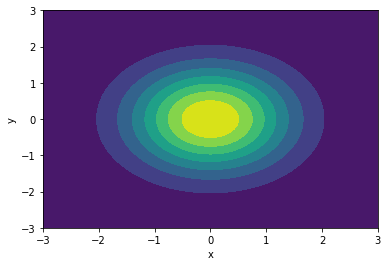

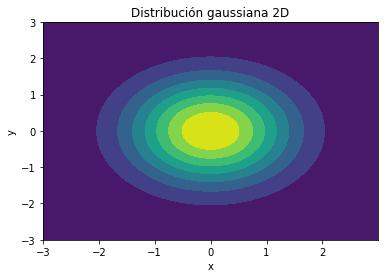

In [16]:
import numpy as np 
import matplotlib.pyplot as plt

#Utilizando una función gaussiana como la utilizada previamente
def gauss(x,m,s):
    return 1/(np.sqrt(2*np.pi)*s)*np.exp(-(x-m)**2 / (2*s**2))

x_0=np.linspace(-3,3,600)
x=gauss(x_0,0,1)
y=gauss(x_0,0,1)
xx,yy=np.meshgrid(x,y)
img=xx*yy
plt.contourf(x_0,x_0,img)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


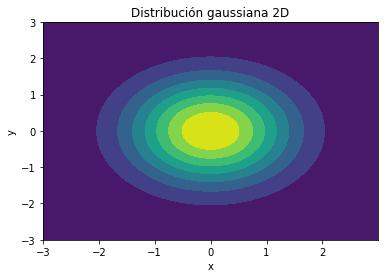

In [50]:

#Sin embargo, al hacer esto, no obtenemos la distribución normal multivariada dadas las condicionales de x, y. 
#Utilizando la función multivariate_normal de scipy, podemos obtenerla, esta función recibe como parámetro
#la media [x,y] y la matriz de covarianza [[c1,c2],[c3,c4]]. Luego podemos graficar la pdf utilizando rv.pdf

from scipy.stats import multivariate_normal

x, y = np.mgrid[-3:3:1.0/100, -3:3:1.0/100]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal([0, 0], [[1, 0], [0, 1]])
plt.contourf(x, y, rv.pdf(pos))
plt.title('Distribución gaussiana 2D')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 1. Valor Esperado y varianza.

Para variables discretas se define el valor esperado de una variable discreta $X$ como 

\begin{equation}
E[X] =\sum_{x}{x p_{X} (x)}
\end{equation}

y para una variable continua:

\begin{equation}
E[X] =\int_{x}{x p_{X} (x)}dx
\end{equation}

y la varianza se define como

\begin{equation}
var[X] = E[(X-E[X])^2]
\end{equation}

#### Ejercicio 2: Obtenga numéricamente el valor esperado y la varianza de una función de distribución Gamma generada aleatoriamente con parámetros $1/\lambda=0.5$ y $k=9$. Realice la gráfica de la distribución y de la CDF.


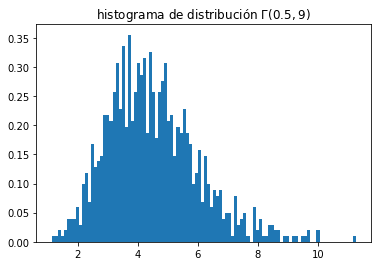

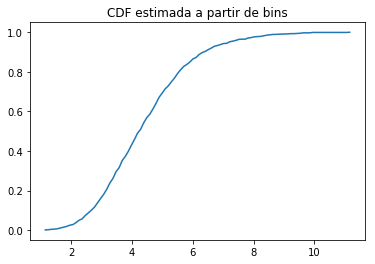

In [54]:
#Realizaremos la gráfica de una distribución gamma con los parámetros dados
shape,scale=9,0.5
g=np.random.gamma(shape,scale,1000)
(n, bins, patches)=plt.hist(g,bins=100,density=True)
plt.title(r'histograma de distribución $\Gamma(0.5,9)$')
plt.show()

#Utilizaremos los bins y n para graficar un estimado de la CDF de esta distribución

plt.plot(bins[:-1],np.cumsum(n)/sum(n))
plt.title('CDF estimada a partir de bins')
plt.show()

# 2. Teorema de Bayes

Volviendo a los fundamentos de probabilidad, hablemos del teorema de probabilidad total, que dicta: Sean $A_1, ..., A_n$ eventos disjuntos que forman una partición del espacio muestral (cada posible resultado está incluido en exactamente uno de los eventos $A_1, ...., A_n$) y asumamos que $P(A_i)>0$ para todo $i$. Entonces, para cada evento $B$, se tiene 

\begin{equation}
P(B)=P(A_1 \cap B)+P(A_n \cap B)
\end{equation}

\begin{equation}
=P(A_1)P(B|A_1)+...+P(A_n)P(B|A_n).
\end{equation}

este teorema lo que dice es que, intuitivamente, estamos particionando el espacio muestral en un número de escenarios $A_i$. Entonces, la probabilidad que $B$ ocurra es un promedio ponderado de la probabilidad condicional sobre cada escenario, donde cada escenario es pesado de acuerdo con su probabilidad. Esto permite calcular la probabilidad de varios eventos $B$ para los cuales las probabilidades $P(B|A_i)$ son conocidas o fáciles de obtener. El teorema de probabilidad total puede ser aplicado repetidamente para calcular probabilidades en experimentos que tienen caracter secuencial. 


## Inferencia y regla de Bayes. 

El teorema de probabilidad total es usualmente usado en conjunto con el teorema de Bayes, que relaciona las probabilidades condicionales de la forma $P(A|B)$ cno probabilidades condicionales de la forma $P(B|A)$, en el cual el orden del condicionamiento es contrario. 

#### Regla de Bayes
Sean $A_1, A_2, ..., A_n$ eventos disjuntos que forman una partición del espacio muestral, y asumiendo que $P(A_i)>0 $ para todo $i$. Entonces para algún evento tal que $P(B)>0$, se tiene
\begin{equation}
P(A_i|B)=\frac{P(A_i)P(B|A_i)}{P(B)}
\end{equation}

\begin{equation}
=\frac{P(A_i)P(B|A_i)}{P(A_1)P(B|A_1)+...+P(A_n)P(B|A_n)}
\end{equation}

La regla de Bayes es usualmente usada para inferencia. Existen un cierto número de "causas" que producen un "efecto". Es posible observar el efecto y se desea inferir la causa. Los eventos $A_1,...,A_n$ son asociados con las causas y el evento $B$ representa el efecto. La probabilidad $P(B|A_i)$ de que el efecto observado cuando la causa $A_i$ está presente, contribuye a un modelo probabilistico de relación de causa y efecto. Dado el efecto B que se ha observado, se desea evaluar la probabilidad $P(A_i|B)$ de que la causa $A_i$ esté presente. En general se refiere a $P(A_i|B)$ como la probabilidad a posteriori de un evento $A_i$ y a $P(A_i)$ la cual se denomina probabilidad a priori. 

##### Nota:

Es importante recordar el concepto de independencia, que dice que cuando $P(A|B)=P(A)$, entonces A es independiente de B. Por lo que por definición:

\begin{equation}
P(A\cup B)=P(A)P(B)
\end{equation}

En el caso en que $P(B)=0$, entonces $P(A|B)$ no está definida, por lo que la relación se mantiene. La simetría de esta relación también implica que la independencia es una propiedad simétrica; es decir, que si A es independiente de B, entonces B es independiente de A, y se puede decir que A y B son eventos independientes. 

Además, también es importante notar que la independencia condicional entre un evento C y dos eventos B y C, es condicional si

\begin{equation}
P(A\cup B| C)=P(A|C)P(B|C)
\end{equation}

Que significa, en otras palabras, que si se sabe que C ocurrió, el conocimiento adicional de que B también ocurrió no cambia la probabilidad de A. La independencia entre dos eventos A y B respecto a una ley de probabilidad incondicional no implica la independencia condicional y viceversa. 



# 3 Inferencia Bayesiana

La inferencia estadística es el proceso de extraer información a partir de una variable o un modelo desconocido a partir de información disponible. 

La infrencia estadística difiere de la teoría de probabilidad en formas fundamentales. La probabilidad es un área de las matemáticas completamente autocontenida, basada en axiomas, como ya se ha visto. En razonamiento probabilístico se asume un modelo probabilístico completamente especificado que obedece estos axiomas. Luego se hace uso de un método matemático para cuantificar las consecuencias de este modelo o responder varias preguntas de interés. En particular, cada pregunta no ambigua tiene una respuesta correcta única. 

La estadística es diferente. Para cualquier problema, pueden existir múltiples métodos razonables, con diferentes respuestas. En general, no hay una forma de obtener el mejor método, a menos que se realicen suposiciones fuertes y se impongan restricciones adicionales sobre la inferencia. 


En la estadística Bayesiana, todas las suposiciones se localizan en un lugar, en la forma de un prior, los estadístas Bayesianos argumentan que todas las suposiciones son traidas a una superficie y están dispuestas al escrutinio. 

Finalmente hay consideraciones prácticas. En muchos casos, los métodos Bayesianos son computacionalmente intratables. Sin embargo, con las capacidades de cómputo recientes, gran parte de la comunidad se enfoca en realizar métodos Bayesianos más prácticos y aplicables. 


Conceptos clave:

- En estadística Bayesiana, se tratan los parámetros desconocidos como variables aleatorias con distribuciones a priori conocidas. 

- En estimación de parámetros se quiere generar un estimado de qué tan cercanos están los valores de los estimadores a los verdaderos valores de los parámetros en un sentido probabilístico. 

- En pruebas de hipótesis, el parámetro desconocido toma uno de valores infinitos, correspondiente según la hipótesis. Se quiere seleccionar una hipótesis basados en una pequeña probabilidad de error. 

- Los principales métodos de inferencia Bayesiana son:

	- MAP: (Maximun a posteriori probability): A partir de posibles valores de parámetros, se selecciona uno con máxima probabilidad condicional dados unos datos. 

	- LMS: (Least Mean Squares) Se selecciona un estimador/función de los datos que minimiza el error cuadrático medio entre el parámetro y su estimado. 

	- Linear Least Mean Squares: Se selecciona un estimador que es una función lineal de los datos y minimiza el error cuadrático medio entre los parámetros y su estimado. 
    
    
    
En inferencia bayesiana, la cantidad de interés se denota por $\Theta$, y es modelada como una variable aleatoria o como una colección finita de variables aleatorias. Aquí, $\theta$ puede representar cantidades físicas, tales como una velocidad o una posición, o un conjunto de parámetros desconocidos de un modelo probabilístico. Por simpleza, a menos que lo contrario sea explícitamente mencionado, se ve $\Theta$ como una variable aleatoria.

El objetivo es extraer información acerca de $\theta$, basado en observar una colección de variables aleatorias $X=(X_1,...,X_n)$ relacionadas, llamadas observaciones, medidas o vector de observaciones. Por esto, se asume que se conoce la distribución conjunta de $\Theta$ y $X$. Es decir, 

- Se asume el conocimiento de la distribución a priori $p_\theta$, dependiendo de si $\theta$ es discreta o continua-

- Una distribución condicional $p_{X|\theta}$, dependiendo de si X es discreta o continua. 

Una vez un valor particular de $x$ en $X$ ha sido observado, una respuesta completa de un problema de inferencia es proveído por la distribución a posteriori. Esta distribución está determinada por la forma apropiada de la regla de Bayes y encapsula todo el conocimiento que se pueda tener acerca de $\Theta$ dada la información disponible. 

### Resumen:

- Se comienza con una distribución a priori $p_{\Theta}$ o $f_{\Theta}$ para una variable desconocida aleatoria $\Theta$.

- Se tiene un modelo $p_{X|\Theta}$ o $f_{X|\Theta}$ del vector se observaciones X. 

- Después de observar el valor $x$ en $X$, se forma la distribución a posteriori de $\Theta$, usando la versión apropiada de la regla de Bayes. 

##### Ejercicio:
Suponga que tratamos con las dos siguientes hipótesis

\begin{equation}
H_1:p=0.1,H_2:p=0.2
\end{equation}

donde $p=0.2$ está basada en una proporción muestral de 1 a 5. 


Primero asumamos que el tamaño de la muestra es $n=5$, $k=1$ donde, k significa una pelota amarilla que escojemos entre n pelotas. También podemos asumor que la probailidad a priori es 0.5 y 0.5, es decir igual para ambas hipótesis. Es posible actualizar la probabilidad a posteriori de cada hipótesis utilizando la regla de Bayes. Calcule las probabilidades P(p=0.1) y P(p=0.2) respectivamente para muestras de tamaño 5, 10, 15 y 20 y concluya al respecto. 

In [57]:
from scipy.stats import binom

n=[5,10,15,20]

p1=0.1
p2=0.2

k=1

for n_ in n:
    p_1= binom(n_, p1)
    p_2=binom(n_,p2)
    """
    P1=p_1.pmf(k)*0.5/(p_1.pmf(k)*0.5+p_2.pmf(k)*0.5)
    P2=p_2.pmf(k)*0.5/(p_1.pmf(k)*0.5+p_2.pmf(k)*0.5)

    print(".............")
    
    print("P(H1):%lf para n=%d"%(P1,n_))
    print("P(H2):%lf para n=%d"%(P2,n_))
    """
    P1=p_1.pmf(k)*0.5
    P2=p_2.pmf(k)*0.5
    
    nm=P1+P2
    
    print(".............")
    
    print("P(H1):%lf para n=%d"%(P1/nm,n_))
    print("P(H2):%lf para n=%d"%(P2/nm,n_))

    
    

.............
P(H1):0.444723 para n=5
P(H2):0.555277 para n=5
.............
P(H1):0.590710 para n=10
P(H2):0.409290 para n=10
.............
P(H1):0.722283 para n=15
P(H2):0.277717 para n=15
.............
P(H1):0.824151 para n=20
P(H2):0.175849 para n=20


# Referencias.

- Wackerly, D. Mathematical Statistics with Applications. 2008
- Bertsekas, D. Introduction to Probability. 2008.
- Sivia, D.S. Data Analysis: A Bayesian Tutorial. 2006.